MY FIRST JUPITER NOTEBOOK - GETTING STARTED

In this first notebook I'll explore how I can use jupiter notebook to do and document a small analysis on a Movie dataset.

First I'll start by preparing the dataset that will be used in the analysis:

In [228]:
import pandas as pd
import json
import re
pd.options.mode.chained_assignment = None  # default='warn'

#choose columns to work with movie dataset
df = pd.read_csv('C:\JupiterNotebook\Datasets\movies.csv', usecols=["id","budget","original_title","popularity","cast","revenue"]) 
# check for null entries in each column
#print(df.isnull().sum())
#remove entries with null values for cast column
df1 = df.dropna()

#treat column with cast -> create list with only name of actors in movie
pattern1= re.compile("('name': '[A-Z][a-z]* [A-Z][a-z]*')")

def clean_cast(cast):
    cast_final= re.findall(pattern1,cast)
    cast_final_split= list()
    for item in cast_final:
        itemwords= item.split(':')[-1].strip()
        itemwords=itemwords.replace('"','')
        itemwords=itemwords.replace("'",'')
        cast_final_split.append(itemwords)
    return cast_final_split

df1['cast']=df1['cast'].apply(clean_cast)

#For the sake of the analysis I used the following assumption: 
#An actor is famous if the name is included in a list of actors retrieved from https://github.com/algolia/datasets/tree/master/movies 
#(This index holds an extract of the most popular movies. It was extracted using the IMDB API.)

# datafrane with famous actors
df_a = pd.read_json('C:/JupiterNotebook/Datasets/actors.json', orient='records')
df_a=df_a.filter(items=['name'])
f_actors=df_a.values.tolist()
f_actors_final=[item for sublist in f_actors for item in sublist]

#check for famous actors in movies - create new column famous_actors (number of famous actors in movies)
famous_actors_count=list()
for idx in df1.index:
    p=set(df1.loc[[idx],'cast'].item())&set(f_actors_final)
    famous_actors_count.append(len(p))
 
df1['famous_actors']=famous_actors_count


After having the dataset prepared we can start doing some analysis.
Firstly I would like to respond the following questions:

1. Top 10 movies based on Budget
2. Top 10 movies based on Revenue
3. Top 10 movies based on Popularity
4. Top 10 movies with the more Famous Actors
5. Top 10 flop movies (high budget->low revenue)

1. Top 10 movies based on Budget

Text(0, 0.5, 'Movie')

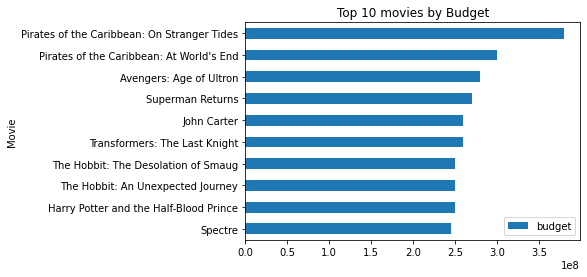

In [217]:
import matplotlib.pyplot as plt
#Top 10 movies based on Budget
s_budget_top_10=df1.sort_values('budget', ascending=False).head(10)

s_budget_top_10.sort_values('budget', ascending=True).plot(kind="barh", x='original_title', y='budget')
plt.title("Top 10 movies by Budget")
plt.ylabel("Movie")


2. Top 10 movies based on Revenue

Text(0, 0.5, 'Movie')

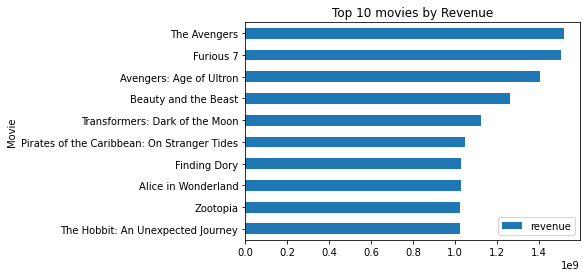

In [220]:
#Top 10 movies based on revenue
s_revenue_top_10=df1.sort_values('revenue', ascending=False).head(10)

s_revenue_top_10.sort_values('revenue', ascending=True).plot(kind="barh", x='original_title', y='revenue')
plt.title("Top 10 movies by Revenue")
plt.ylabel("Movie")


Is there a correlation betwwen Budget and Revenue? Can we say that spending a higher Budget on a film most of the time will result in higher Revenues?
(Positive Corretation - When two variables in a dataset increase or decrease together, then it is known as a positive correlation.)

In [221]:
correlation = df1["budget"].corr(df1["revenue"])
print(correlation)

0.749698861558845


This is a high value for positive correlation! Budget and Revenue are definitely correlated.

3. Top 10 movies based on Popularity

Text(0, 0.5, 'Movie')

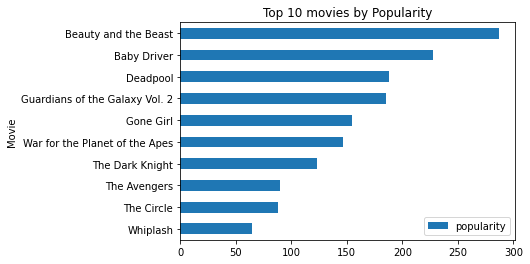

In [222]:
#Top 10 movies based on popularity
s_popularity_top_10=df1.sort_values('popularity', ascending=False).head(10)

s_popularity_top_10.sort_values('popularity', ascending=True).plot(kind="barh", x='original_title', y='popularity')
plt.title("Top 10 movies by Popularity")
plt.ylabel("Movie")


Is there a correlation betwwen Popularity and Revenue? Can we say that spending a higher Popularity on a film most of the time generated higher Revenues?
(Positive Corretation - When two variables in a dataset increase or decrease together, then it is known as a positive correlation.)

In [223]:
correlation = df1["popularity"].corr(df1["revenue"])
print(correlation)

0.4650866709157228


This is a low value for positive correlation, seems like Popularity and Revenue are not correlated.

4. Top 10 movies with more Famous Actors

Text(0, 0.5, 'Movie')

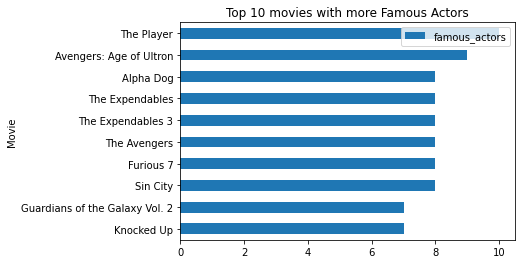

In [224]:
#Top 10 movies with more Famous Actors
s_famous_actors_top_10=df1.sort_values('famous_actors', ascending=False).head(10)

s_famous_actors_top_10.sort_values('famous_actors', ascending=True).plot(kind="barh", x='original_title', y='famous_actors')
plt.title("Top 10 movies with more Famous Actors")
plt.ylabel("Movie")

Is there a correlation betwwen Famous Actors and Revenue? Can we say that movies with a higher number of Famous Actors most of the time generated higher Revenues?
(Positive Corretation - When two variables in a dataset increase or decrease together, then it is known as a positive correlation.)

In [225]:
correlation = df1["famous_actors"].corr(df1["revenue"])
print(correlation)

0.42070472309961526


This is a low value for positive correlation, seems like Famous Actors and Revenue are not correlated.

Is there a correlation betwwen Famous Actors and Popularity? Can we say that movies with a higher number of Famous Actors most of the time generated higher Popularity?
(Positive Corretation - When two variables in a dataset increase or decrease together, then it is known as a positive correlation.)

In [226]:
correlation = df1["famous_actors"].corr(df1["popularity"])
print(correlation)

0.26748932036114603


This is a low value for positive correlation, seems like Famous Actors and Popularity are not correlated.

Is there a correlation betwwen Famous Actors and Budget? Can we say that movies with a higher number of Famous Actors most of the has impact on a film Budget?
(Positive Corretation - When two variables in a dataset increase or decrease together, then it is known as a positive correlation.)

In [227]:
correlation = df1["famous_actors"].corr(df1["budget"])
print(correlation)

0.4810587026699662


This is a low value for positive correlation, seems like Famous Actors and Budget are not correlated.

5. Top 10 Flop Movies

In [242]:
#Top 10 flop movies

s_temp=df1[["original_title","budget","revenue"]]
s_temp['diff']=s_temp['revenue']-s_temp['budget']



s_top_10_flops=s_temp.sort_values('diff', ascending=True).head(10)

print('Top Flops:')
i=1;
for v in s_top_10_flops['original_title']:
    print(str(i),':',v)
    i=i+1

Top Flops:
1 : The Adventures of Pluto Nash
2 : Cutthroat Island
3 : Live by Night
4 : Australia
5 : Supernova
6 : A Sound of Thunder
7 : How Do You Know
8 : The Great Raid
9 : The Invasion
10 : Virus
